In [8]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt 


X,y = make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

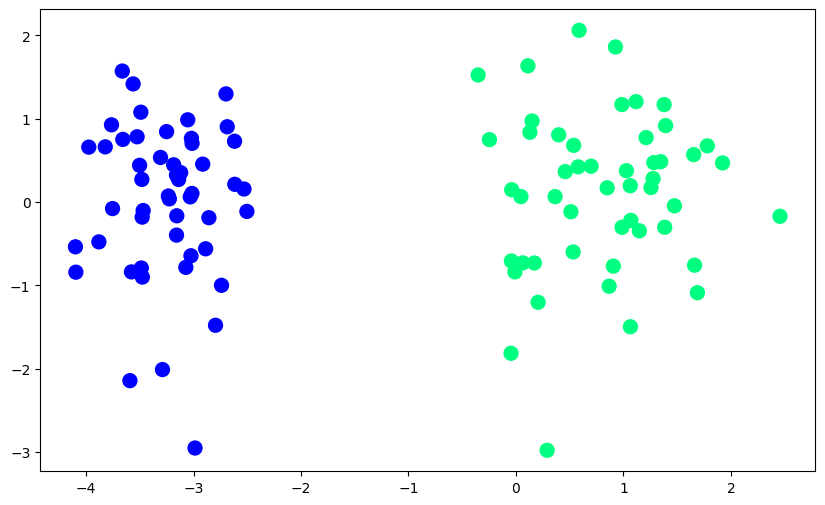

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [13]:
print(lor.coef_)
print(lor.intercept_)

[[5.00704705 0.25917793]]
[5.89602046]


In [26]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_[0]/lor.coef_[0][1])
print(m1, b1)

-19.31895619115272 -22.748929633390254


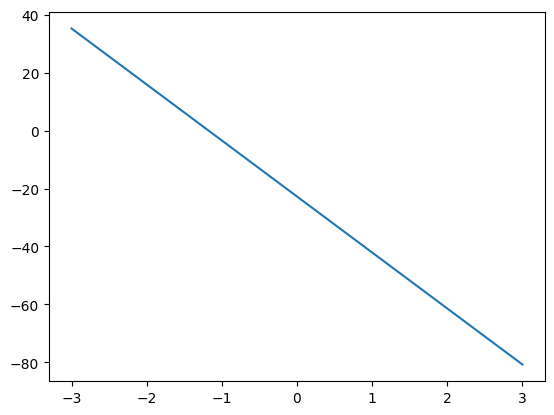

In [27]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1
plt.plot(x_input,y_input)

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
def lrgd(X,y):
    X = np.insert(X,0,1,axis=1)
    
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot(y-y_hat,X) / X.shape[0])
    
    return weights[1:], weights[0]

In [21]:
coef_, intercept_ =  lrgd(X,y)

print(coef_)
print(intercept_)

[4.83926872 0.21182255]
5.83338864905325


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

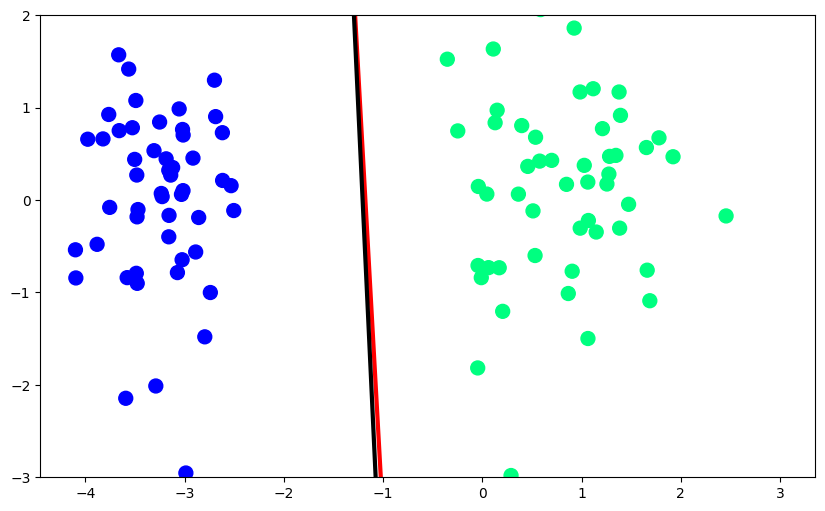

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)